# Total snow extension's comparison between initial historical and regridded files 

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-03-27T14:14:40.126132+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-31-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import xesmf as xe
import matplotlib.pyplot as plt
import glob

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [3]:
%watermark --iversions

xesmf     : 0.8.8
pandas    : 2.2.3
matplotlib: 3.10.0
watermark : 2.5.0
xarray    : 2025.1.1
numpy     : 2.0.2



In [4]:
# models
models = [
    "BCC-CSM2-MR", "CanESM5", "CanESM5-CanOE", "CESM2", "CESM2-WACCM", "CIESM",
    "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "EC-Earth3", "EC-Earth3-Veg",
    "FGOALS-f3-L", "FGOALS-g3", "GFDL-CM4", "GISS-E2-1-G", "HadGEM3-GC31-LL",
    "IPSL-CM6A-LR", "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR",
    "MRI-ESM2-0", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"
]

In [5]:
# path initial files
path_ini_hist = "/home/jovyan/private-storage/historical-LImon-snc/"

In [6]:
datasets_ini_hist = {}

for model in models:
    file_pattern = os.path.join(path_ini_hist, f"snc_LImon_{model}_historical_*.nc")
    files = glob.glob(file_pattern)
    
    datasets_ini_hist[model] = xr.open_mfdataset(files, combine='by_coords')

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


In [7]:
# areacella
path_areacella = "/home/jovyan/private-storage/masques/masques/areacella/"
path_pseudo_areacella = "/home/jovyan/private-storage/masques/masques/pseudo_areacella/"

In [8]:
datasets_area = {}
for model in models:
    area_file_path = os.path.join(path_areacella, f"areacella_{model}.nc")
    pseudo_area_file_path = os.path.join(path_pseudo_areacella, f"areacella_{model}.nc")

    if os.path.exists(area_file_path):
        datasets_area[model] = xr.open_dataset(area_file_path)['areacella']
    elif os.path.exists(pseudo_area_file_path):
        datasets_area[model] = xr.open_dataset(pseudo_area_file_path)['areacella']
    else:
        print(f"Pas de fichier d'aire trouvé pour {model} !")
        datasets_area[model] = None

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'areacella' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


## Test pour un modèle historique (initial)

In [9]:
path_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/historical-LImon-snc/", "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")

In [10]:
BCC_CSM2 = xr.open_dataset(path_BCC_CSM2)
BCC_CSM2

<xarray.Dataset> Size: 406MB
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
  * lon        (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    snc        (time, lat, lon) float32 406MB ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2289.0
    comment:                The model integration starts from the piControl e...
    ...                     ...
    title:                  BCC-CSM2-MR output prepared for CMIP6
    tracking_id:            hdl:21.14100/b44193ab-576d-4f12-b31f-5f319b74252e
    variable_id:            snc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by BCC is licensed unde...
    cmor_version:           3.3.2

In [11]:
path_areacella_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_areacella/", "areacella_BCC-CSM2-MR.nc")

In [12]:
areacella_BCC_CSM2 = xr.open_dataset(path_areacella_BCC_CSM2)
areacella_BCC_CSM2

<xarray.Dataset> Size: 412kB
Dimensions:    (lon: 320, lat: 160)
Coordinates:
  * lon        (lon) float32 1kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
  * lat        (lat) float32 640B -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Data variables:
    areacella  (lat, lon) float64 410kB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/...
    history:      Sat Dec 21 01:26:42 2019: ncrename -O --variable cell_area,...

In [13]:
BCC_CSM2_ref = BCC_CSM2.sel(time=slice("1995", "2014"))
BCC_CSM2_ref

<xarray.Dataset> Size: 49MB
Dimensions:    (time: 240, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 2kB 1995-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
  * lon        (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 4kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    snc        (time, lat, lon) float32 49MB ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2289.0
    comment:                The model integration starts from the piControl e...
    ...                     ...
    title:                  BCC-CSM2-MR output prepared for CMIP6
    tracking_id:            hdl:21.14100/b44193ab-576d-4f12-b31f-5f319b74252e
    variable_id:            snc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by BCC is licensed unde...
    cmor_version:           3.3.2

In [14]:
snow_cover = BCC_CSM2_ref["snc"]
snow_cover = snow_cover.groupby("time.month").mean(dim="time")

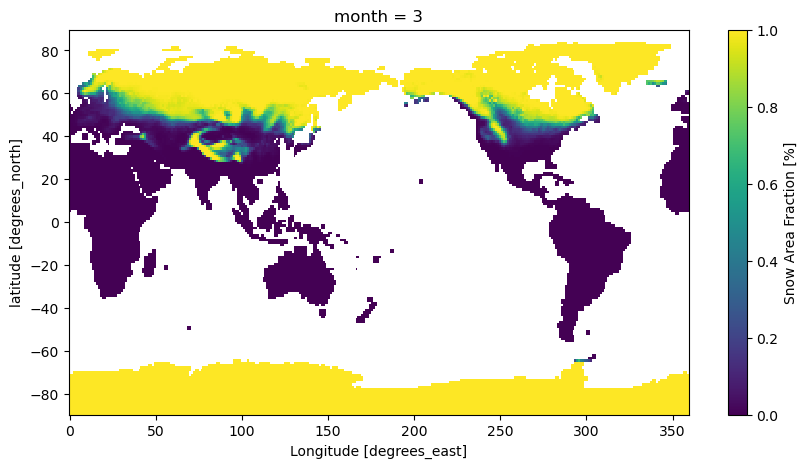

In [15]:
july_snow_cover = snow_cover.sel(month=3)

plt.figure(figsize=(10, 5))
july_snow_cover.plot()

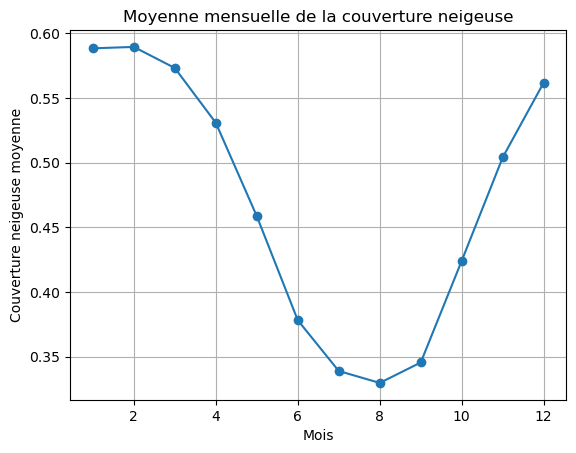

In [16]:
monthly_mean = snow_cover.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

In [17]:
cell_area = areacella_BCC_CSM2["areacella"]

snow_cover_km2 = (snow_cover * (cell_area * 1e-6) ).groupby(snow_cover["month"]).sum(dim=["lat", "lon"], skipna=True)

print(snow_cover_km2)
print(snow_cover_km2.shape)

<xarray.DataArray (month: 12)> Size: 96B
array([58981824.75728922, 59132482.01409894, 55748582.19121736,
       47660078.81770545, 35890087.72006677, 24799681.77587515,
       20006093.51974487, 19002958.36472448, 20847414.80936202,
       30980534.51265276, 43109260.4415566 , 53662911.05947356])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


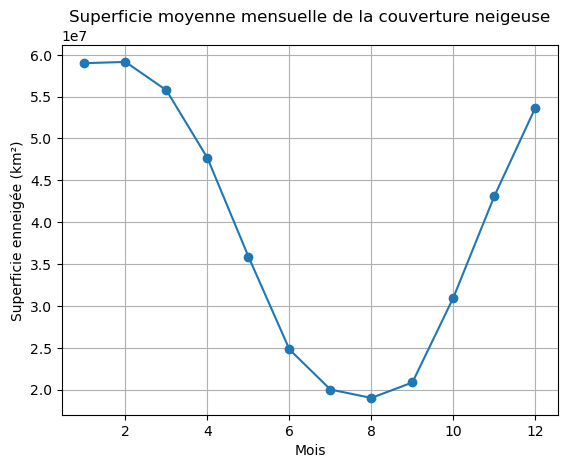

In [18]:
plt.plot(range(1, 13), snow_cover_km2, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

In [19]:
area = cell_area.sum(dim=["lat", "lon"], skipna=True)
print(area)

<xarray.DataArray 'areacella' ()> Size: 8B
array(5.10064472e+14)


## Test pour un modèle historique (regriddé)

### Modèle reggridé

In [20]:
path_BCC_CSM2_regrid = os.path.join("/home/jovyan/private-storage/interp_models_hist/", "BCC-CSM2-MR_hist_reprojete.nc")

In [21]:
BCC_CSM2_regrid = xr.open_dataset(path_BCC_CSM2_regrid)

In [22]:
BCC_CSM2_regrid_ref = BCC_CSM2_regrid.sel(time=slice("1995", "2014"))

In [23]:
snow_cover_regrid = BCC_CSM2_regrid_ref["snc"]
snow_cover_regrid = snow_cover_regrid.groupby("time.month").mean(dim="time")

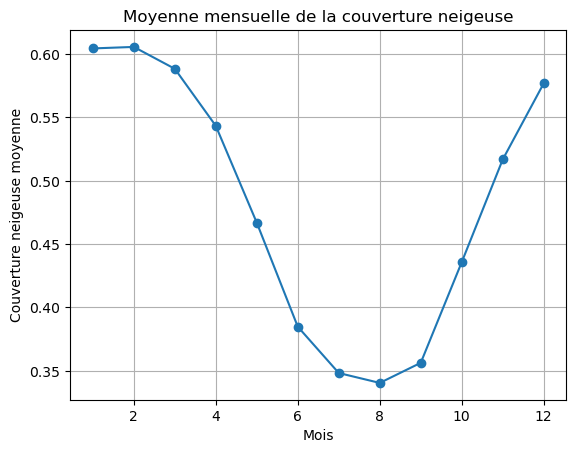

In [24]:
monthly_mean_regrid = snow_cover_regrid.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean_regrid, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

### Areacella reggridé

In [25]:
path_areacella_reggride = "/home/jovyan/private-storage/interp_areacella/"

In [26]:
datasets_area_reggride = {}
for model in models:
    area_file_path_reggride = os.path.join(path_areacella_reggride, f"{model}_areacella_reprojete.nc")

    if os.path.exists(area_file_path_reggride):
        datasets_area_reggride[model] = xr.open_dataset(area_file_path_reggride)['areacella']
    
    else:
        print(f"⚠️ Pas de fichier d'aire trouvé pour {model} !")
        datasets_area_reggride[model] = None

In [27]:
path_areacella_reggride_BCC_CSM2 = os.path.join("/home/jovyan/private-storage/interp_areacella/", "BCC-CSM2-MR_areacella_reprojete.nc")

In [28]:
areacella_reggride_BCC_CSM2 = xr.open_dataset(path_areacella_reggride_BCC_CSM2)
areacella_reggride_BCC_CSM2

<xarray.Dataset> Size: 523kB
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    areacella  (lat, lon) float64 518kB ...
Attributes:
    regrid_method:  bilinear

In [29]:
cell_area = areacella_reggride_BCC_CSM2["areacella"]

snow_cover_km2_regrid = (snow_cover_regrid * (cell_area * 1e-6) ).groupby(snow_cover_regrid["month"]).sum(dim=["lat", "lon"], skipna=True)

print(snow_cover_km2_regrid)
print(snow_cover_km2_regrid.shape)

<xarray.DataArray (month: 12)> Size: 96B
array([69202283.64770281, 69393112.12220207, 65254691.43734431,
       55323633.03939654, 40937583.70415604, 27840229.12239703,
       22619933.02602117, 21616636.05700089, 23793526.94524597,
       35768499.08355504, 50089382.96249479, 62809402.91068856])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


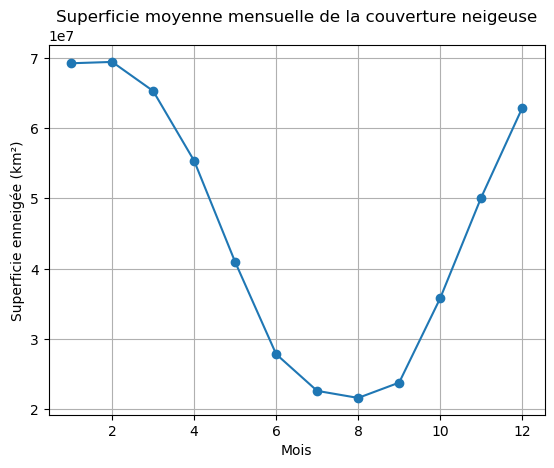

In [30]:
plt.plot(range(1, 13), snow_cover_km2_regrid, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

### Combinaison fichier initial et nouvelle grille

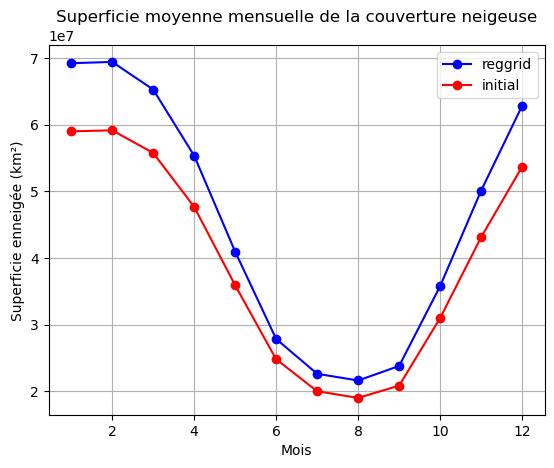

In [31]:
plt.plot(range(1, 13), snow_cover_km2_regrid, marker="o", color="blue", label="reggrid")
plt.plot(range(1, 13), snow_cover_km2, marker="o", color="red", label="initial")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.legend()
plt.grid()
plt.show()

In [32]:
diff = snow_cover_km2_regrid - snow_cover_km2
diff

<xarray.DataArray (month: 12)> Size: 96B
array([10220458.89041359, 10260630.10810313,  9506109.24612694,
        7663554.22169109,  5047495.98408927,  3040547.34652188,
        2613839.5062763 ,  2613677.6922764 ,  2946112.13588395,
        4787964.57090228,  6980122.52093819,  9146491.851215  ])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [33]:
snow_cover_km2

<xarray.DataArray (month: 12)> Size: 96B
array([58981824.75728922, 59132482.01409894, 55748582.19121736,
       47660078.81770545, 35890087.72006677, 24799681.77587515,
       20006093.51974487, 19002958.36472448, 20847414.80936202,
       30980534.51265276, 43109260.4415566 , 53662911.05947356])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [34]:
snow_cover_km2_regrid

<xarray.DataArray (month: 12)> Size: 96B
array([69202283.64770281, 69393112.12220207, 65254691.43734431,
       55323633.03939654, 40937583.70415604, 27840229.12239703,
       22619933.02602117, 21616636.05700089, 23793526.94524597,
       35768499.08355504, 50089382.96249479, 62809402.91068856])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

Text(0.5, 1.0, 'Difference between initial and reggrided files')

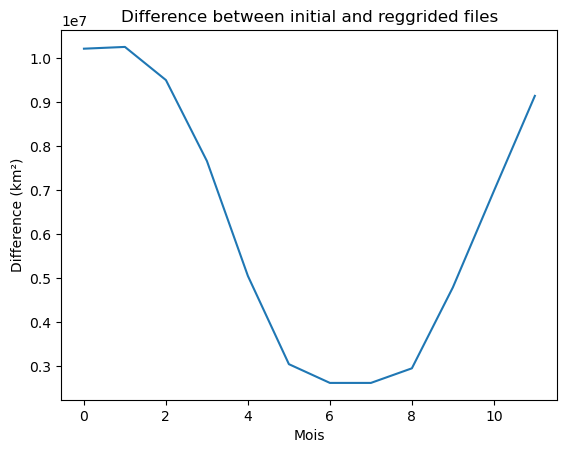

In [35]:
plt.plot(diff)
plt.xlabel("Mois")
plt.ylabel("Difference (km²)")
plt.title("Difference between initial and reggrided files")

### Essai pour FGOALS-f3-L

### Initial

In [36]:
path_FGOALS_f3_L = os.path.join("/home/jovyan/private-storage/historical-LImon-snc/", "snc_LImon_FGOALS-f3-L_historical_r1i1p1f1_gn_185001-201412.nc")

In [37]:
FGOALS_f3_L = xr.open_dataset(path_FGOALS_f3_L)
FGOALS_f3_L

<xarray.Dataset> Size: 438MB
Dimensions:    (time: 1980, bnds: 2, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    snc        (time, lat, lon) float32 438MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   59400.0
    branch_time_in_parent:  59400.0
    creation_date:          2019-08-21T02:40:39Z
    ...                     ...
    cmor_version:           3.4.0
    experiment_id:          historical
    variant_label:          r1i1p1f1
    realization_index:      1
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CAS.FGOALS-f...
    history:                Thu Sep 26 09:48:47 2019: ncatted -O -a further_i...

In [38]:
path_areacella_FGOALS_f3_L = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_areacella/", "areacella_FGOALS-f3-L_gn.nc")

In [39]:
areacella_FGOALS_f3_L = xr.open_dataset(path_areacella_FGOALS_f3_L)
areacella_FGOALS_f3_L

<xarray.Dataset> Size: 444kB
Dimensions:    (lon: 288, lat: 192)
Coordinates:
  * lon        (lon) float32 1kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float32 768B -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
Data variables:
    areacella  (lat, lon) float64 442kB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/...
    history:      Sat Dec 21 01:26:42 2019: ncrename -O --variable cell_area,...

In [40]:
FGOALS_f3_L_ref = FGOALS_f3_L.sel(time=slice("1995", "2014"))

In [41]:
snow_cover_FGOALS = FGOALS_f3_L_ref["snc"]
snow_cover_FGOALS = snow_cover_FGOALS.groupby("time.month").mean(dim="time")

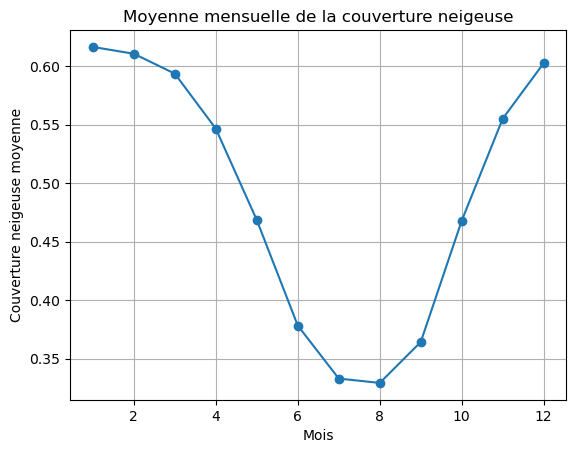

In [42]:
monthly_mean_FGOALS = snow_cover_FGOALS.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean_FGOALS, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

In [43]:
cell_area_FGOALS = areacella_FGOALS_f3_L["areacella"]
snow_cover_km2_FGOALS = (snow_cover_FGOALS * (cell_area_FGOALS * 1e-6)).groupby("month").sum(dim=["lat", "lon"], skipna=True)

print(snow_cover_km2_FGOALS)
print(snow_cover_km2_FGOALS.shape)

<xarray.DataArray (month: 12)> Size: 96B
array([63498781.47508408, 62088095.97468238, 57861029.63575611,
       48540943.29789265, 35722681.64152189, 23763321.06038558,
       18912701.84500913, 18491285.90957574, 22162857.55362692,
       35909992.97128662, 50501715.85814638, 59872355.21131966])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


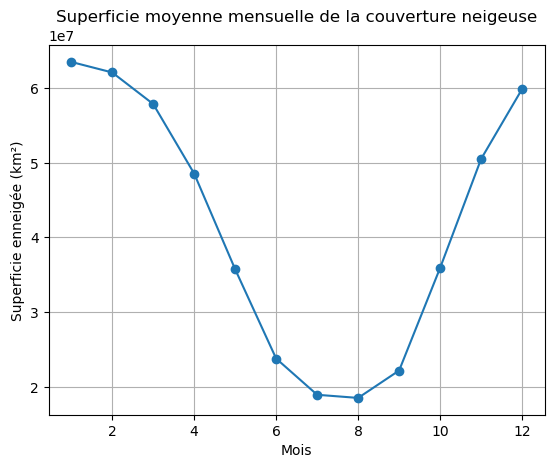

In [44]:
plt.plot(range(1, 13), snow_cover_km2_FGOALS, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

### Reggriddé

In [45]:
path_FGOALS_regrid = os.path.join("/home/jovyan/private-storage/interp_models_hist/", "FGOALS-f3-L_hist_reprojete.nc")

In [46]:
FGOALS_regrid = xr.open_dataset(path_FGOALS_regrid)

In [47]:
FGOALS_regrid_ref = FGOALS_regrid.sel(time=slice("1995", "2014"))

In [48]:
snow_cover_regrid_FGOALS = FGOALS_regrid_ref["snc"]
snow_cover_regrid_FGOALS = snow_cover_regrid_FGOALS.groupby("time.month").mean(dim="time")

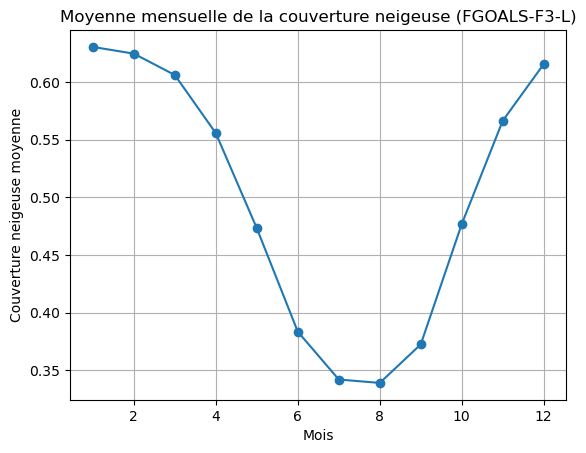

In [49]:
monthly_mean_regrid_FGOALS = snow_cover_regrid_FGOALS.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean_regrid_FGOALS, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse (FGOALS-F3-L)")
plt.grid()
plt.show()

In [50]:
path_areacella_reggride_FGOALS = os.path.join("/home/jovyan/private-storage/interp_areacella/", "FGOALS-f3-L_areacella_reprojete.nc")

In [51]:
areacella_reggride_FGOALS = xr.open_dataset(path_areacella_reggride_FGOALS)
areacella_reggride_FGOALS

<xarray.Dataset> Size: 523kB
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    areacella  (lat, lon) float64 518kB ...
Attributes:
    regrid_method:  bilinear

In [52]:
cell_area_FGOALS = areacella_reggride_FGOALS["areacella"]

snow_cover_km2_regrid_FGOALS = (snow_cover_regrid_FGOALS * (cell_area_FGOALS * 1e-6) ).groupby(snow_cover_regrid_FGOALS["month"]).sum(dim=["lat", "lon"], skipna=True)

print(snow_cover_km2_regrid_FGOALS)
print(snow_cover_km2_regrid_FGOALS.shape)

<xarray.DataArray (month: 12)> Size: 96B
array([74854975.35887344, 73198877.8953381 , 68006832.1772326 ,
       56612005.17867178, 41129496.43677972, 27406093.8566327 ,
       22166562.15826888, 21740420.95737146, 25912921.30503847,
       41990770.50160469, 59300146.14298432, 70468598.39461544])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


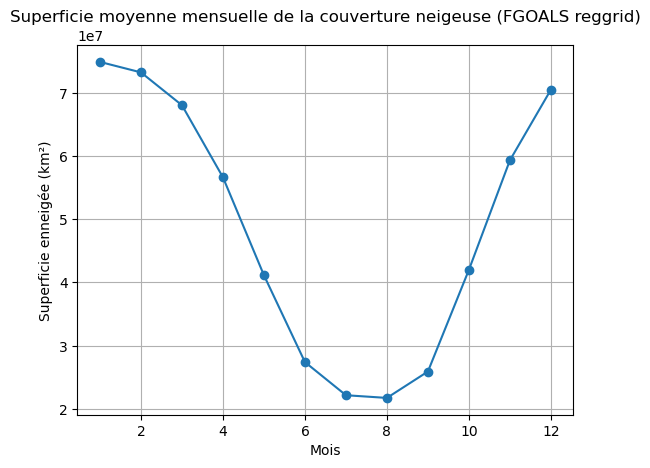

In [53]:
plt.plot(range(1, 13), snow_cover_km2_regrid_FGOALS, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse (FGOALS reggrid)")
plt.grid()
plt.show()

### Comparaison fichier initial et nouvelle grille

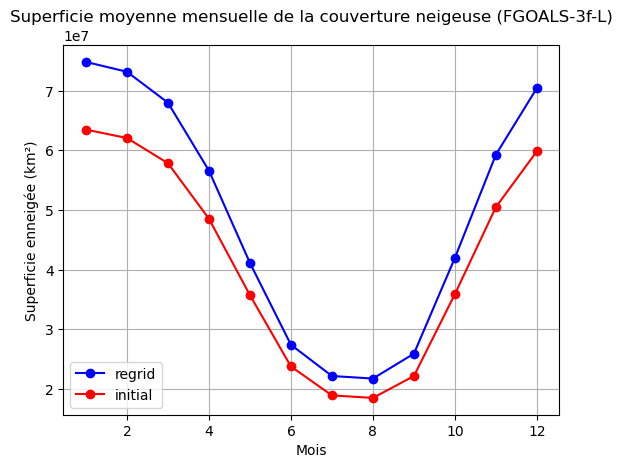

In [54]:
plt.plot(range(1, 13), snow_cover_km2_regrid_FGOALS, marker="o", color="blue", label="regrid")
plt.plot(range(1, 13), snow_cover_km2_FGOALS, marker="o", color="red", label="initial")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse (FGOALS-3f-L)")
plt.legend()
plt.grid()
plt.show()

### Diff initial / regriddé

<xarray.DataArray (month: 12)> Size: 96B
array([11356193.88378936, 11110781.92065572, 10145802.54147648,
        8071061.88077913,  5406814.79525784,  3642772.79624711,
        3253860.31325975,  3249135.04779572,  3750063.75141155,
        6080777.53031807,  8798430.28483795, 10596243.18329578])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


Text(0.5, 1.0, 'Difference between initial and reggrided files (FGOALS)')

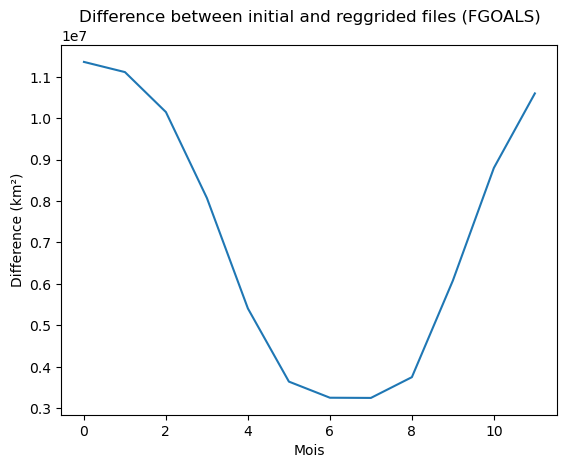

In [55]:
diff_FGOALS = snow_cover_km2_regrid_FGOALS - snow_cover_km2_FGOALS
diff_FGOALS
print(diff_FGOALS)

plt.plot(diff_FGOALS)
plt.xlabel("Mois")
plt.ylabel("Difference (km²)")
plt.title("Difference between initial and reggrided files (FGOALS)")

## Essai pour FGOALS-g3

### Initial

In [56]:
path_FGOALS_g3 = os.path.join("/home/jovyan/private-storage/historical-LImon-snc/", "snc_LImon_FGOALS-g3_historical_r5i1p1f1_gn_185001-201612.nc")

In [57]:
FGOALS_g3 = xr.open_dataset(path_FGOALS_g3)
FGOALS_g3

<xarray.Dataset> Size: 115MB
Dimensions:    (time: 2004, bnds: 2, lat: 80, lon: 180)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2016-12-16 12:00:00
  * lat        (lat) float64 640B -90.0 -84.82 -80.72 ... 80.72 84.82 90.0
  * lon        (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    snc        (time, lat, lon) float32 115MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Spin-up documentation
    branch_time_in_child:   96725.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-19T14:10:32Z
    ...                     ...
    title:                  FGOALS-g3 output prepared for CMIP6
    tracking_id:            hdl:21.14100/df93b3bf-ea27-442d-991a-1a9b435da6c6
    variable_id:            snc
    variant_label:          r5i1p1f1
    license:                CMIP6 model data produced by LASG, Institute of A...
    cmor_version:           3.4.0

In [58]:
path_areacella_FGOALS_g3 = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_areacella/", "areacella_FGOALS-g3.nc")

In [59]:
areacella_FGOALS_g3 = xr.open_dataset(path_areacella_FGOALS_g3)

In [60]:
areacella_FGOALS_g3

<xarray.Dataset> Size: 116kB
Dimensions:    (lon: 180, lat: 80)
Coordinates:
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat        (lat) float32 320B -90.0 -84.82 -80.72 ... 80.72 84.82 90.0
Data variables:
    areacella  (lat, lon) float64 115kB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    CDO:          Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/...
    history:      Sat Dec 21 01:26:43 2019: ncrename -O --variable cell_area,...

In [61]:
FGOALS_g3_ref = FGOALS_g3.sel(time=slice("1995", "2014"))

In [62]:
snow_cover_FGOALS_g3 = FGOALS_g3_ref["snc"]
snow_cover_FGOALS_g3 = snow_cover_FGOALS_g3.groupby("time.month").mean(dim="time")

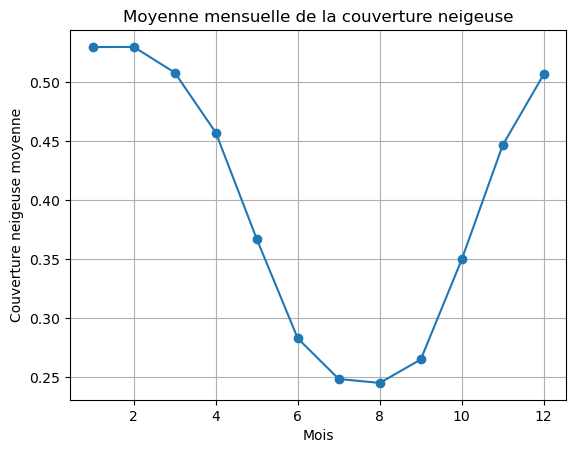

In [63]:
monthly_mean_FGOALS_g3 = snow_cover_FGOALS_g3.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean_FGOALS_g3, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

In [64]:
cell_area_FGOALS_g3 = areacella_FGOALS_g3["areacella"]
snow_cover_km2_FGOALS_g3 = (snow_cover_FGOALS_g3 * (cell_area_FGOALS_g3 * 1e-6)).groupby("month").sum(dim=["lat", "lon"], skipna=True)

print(snow_cover_km2_FGOALS_g3)
print(snow_cover_km2_FGOALS_g3.shape)

<xarray.DataArray (month: 12)> Size: 96B
array([65707958.53343886, 65652608.21090187, 61336743.93385127,
       52204195.78004306, 38021270.40687536, 26344036.86310333,
       21789258.66133827, 21317897.30650992, 23887565.88099219,
       35771812.48252191, 50819881.21642274, 61342878.07528771])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


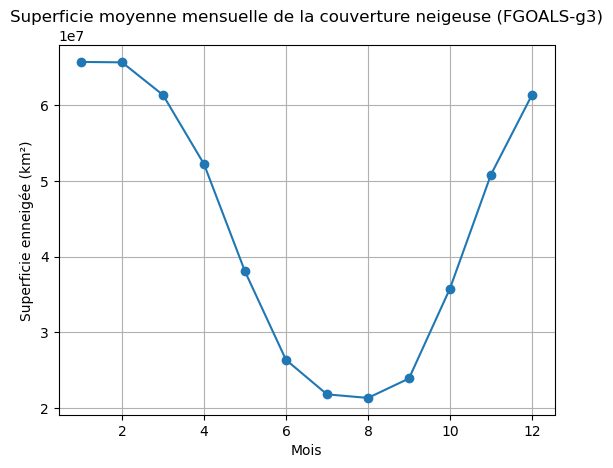

In [65]:
plt.plot(range(1, 13), snow_cover_km2_FGOALS_g3, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse (FGOALS-g3)")
plt.grid()
plt.show()

### Regriddé

In [66]:
path_FGOALS_g3_regrid = os.path.join("/home/jovyan/private-storage/interp_models_hist/", "FGOALS-g3_hist_reprojete.nc")
FGOALS_g3_regrid = xr.open_dataset(path_FGOALS_g3_regrid)

In [67]:
FGOALS_g3_regrid_ref = FGOALS_g3_regrid.sel(time=slice("1995", "2014"))

In [68]:
snow_cover_regrid_FGOALS_g3 = FGOALS_g3_regrid_ref["snc"]
snow_cover_regrid_FGOALS_g3 = snow_cover_regrid_FGOALS_g3.groupby("time.month").mean(dim="time")

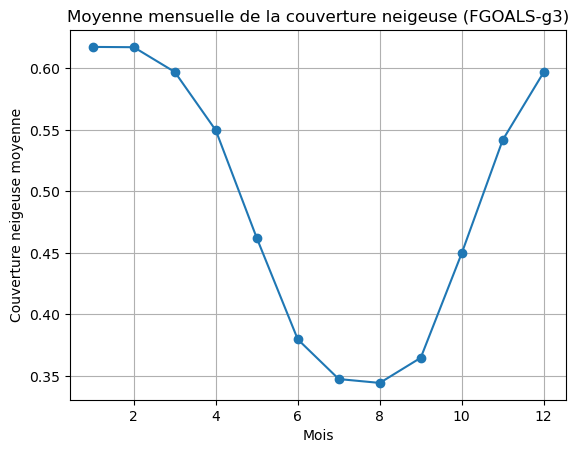

In [69]:
monthly_mean_regrid_FGOALS_g3 = snow_cover_regrid_FGOALS_g3.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean_regrid_FGOALS_g3, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse (FGOALS-g3)")
plt.grid()
plt.show()

In [70]:
path_areacella_reggride_FGOALS_g3 = os.path.join("/home/jovyan/private-storage/interp_areacella/", "FGOALS-g3_areacella_reprojete.nc")
areacella_reggride_FGOALS_g3 = xr.open_dataset(path_areacella_reggride_FGOALS_g3)

In [71]:
areacella_reggride_FGOALS_g3

<xarray.Dataset> Size: 523kB
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    areacella  (lat, lon) float64 518kB ...
Attributes:
    regrid_method:  bilinear

In [72]:
cell_area_FGOALS_g3 = areacella_reggride_FGOALS_g3["areacella"]

snow_cover_km2_regrid_FGOALS_g3 = (snow_cover_regrid_FGOALS_g3 * (cell_area_FGOALS_g3 * 1e-6) ).groupby(snow_cover_regrid_FGOALS_g3["month"]).sum(dim=["lat", "lon"], skipna=True)

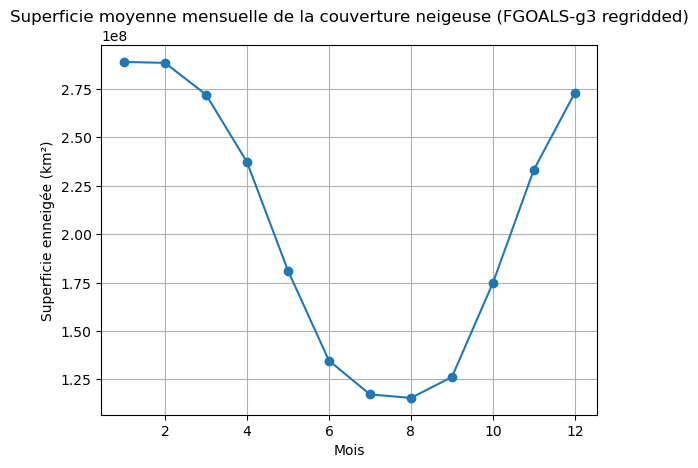

In [73]:
plt.plot(range(1, 13), snow_cover_km2_regrid_FGOALS_g3, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse (FGOALS-g3 regridded)")
plt.grid()
plt.show()

### Comparaison fichier initial et nouvelle grille

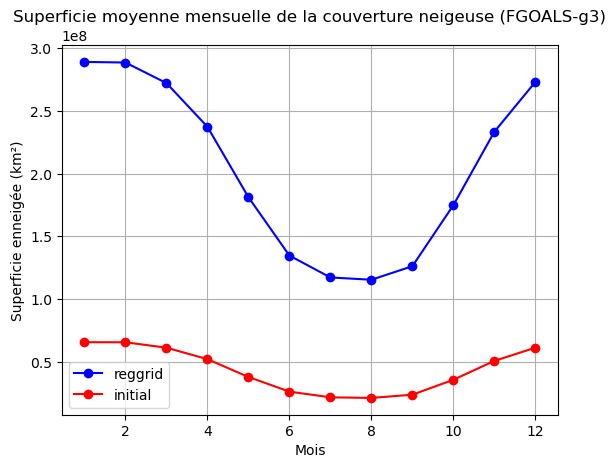

In [74]:
plt.plot(range(1, 13), snow_cover_km2_regrid_FGOALS_g3, marker="o", color="blue", label="reggrid")
plt.plot(range(1, 13), snow_cover_km2_FGOALS_g3, marker="o", color="red", label="initial")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse (FGOALS-g3)")
plt.legend()
plt.grid()
plt.show()

### Diff initial/regridded

<xarray.DataArray (month: 12)> Size: 96B
array([2.23298175e+08, 2.22865079e+08, 2.10826569e+08, 1.85114271e+08,
       1.43227806e+08, 1.08388160e+08, 9.55018372e+07, 9.41462834e+07,
       1.02373559e+08, 1.39113409e+08, 1.82544772e+08, 2.11722486e+08])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


Text(0.5, 1.0, 'Difference between initial and reggrided files (FGOALS_g3)')

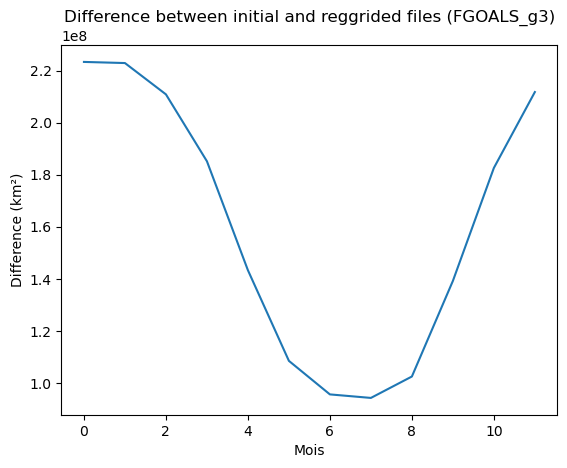

In [75]:
diff_FGOALS_g3 = snow_cover_km2_regrid_FGOALS_g3 - snow_cover_km2_FGOALS_g3
diff_FGOALS_g3
print(diff_FGOALS_g3)

plt.plot(diff_FGOALS_g3)
plt.xlabel("Mois")
plt.ylabel("Difference (km²)")
plt.title("Difference between initial and reggrided files (FGOALS_g3)")

## Plusieurs modèles combinés

<xarray.DataArray (month: 12)> Size: 96B
array([15.17092729, 15.17889651, 14.91879892, 14.2568027 , 13.14583271,
       13.29183508, 14.67913829, 14.94513402, 14.47179076, 14.48122399,
       14.837114  , 15.03682977])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
<xarray.DataArray (month: 12)> Size: 96B
array([14.76896188, 14.78623713, 14.56770239, 13.85222517, 12.32973597,
       10.92141639, 11.5554697 , 12.09104731, 12.38199004, 13.38598122,
       13.93533341, 14.56229709])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


Text(0.5, 1.0, 'Difference between initial and regridded files (%)')

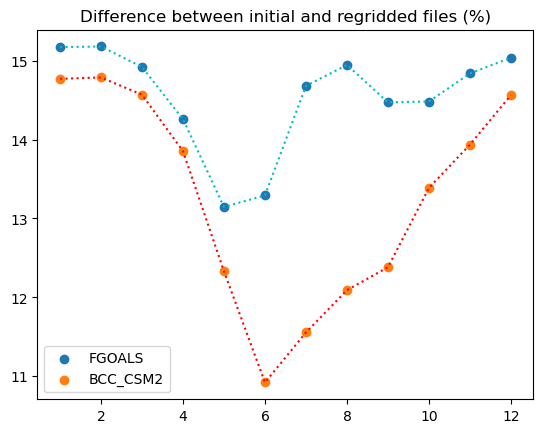

In [76]:
diff_BCC_CSM2_bis = ((snow_cover_km2_regrid - snow_cover_km2)/snow_cover_km2_regrid)*100
diff_FGOALS_bis = ((snow_cover_km2_regrid_FGOALS - snow_cover_km2_FGOALS)/snow_cover_km2_regrid_FGOALS)*100
#diff_FGOALS_g3_bis = ((snow_cover_km2_regrid_FGOALS_g3 - snow_cover_km2_FGOALS_g3)/snow_cover_km2_regrid_FGOALS_g3)*100
print(diff_FGOALS_bis)
print(diff_BCC_CSM2_bis)
#print(diff_FGOALS_g3_bis)

plt.scatter(range(1, 13), diff_FGOALS_bis, label="FGOALS")
plt.scatter(range(1, 13), diff_BCC_CSM2_bis, label="BCC_CSM2")
#plt.scatter(range(1, 13), diff_FGOALS_g3_bis, label="FGOALS-g3")

plt.plot(range(1, 13), diff_FGOALS_bis, ":c")
plt.plot(range(1, 13), diff_BCC_CSM2_bis, ":r")
#plt.plot(range(1, 13), diff_FGOALS_g3, ":p")

plt.legend()
plt.title("Difference between initial and regridded files (%)")

Text(0.5, 1.0, 'Difference between initial and regridded files')

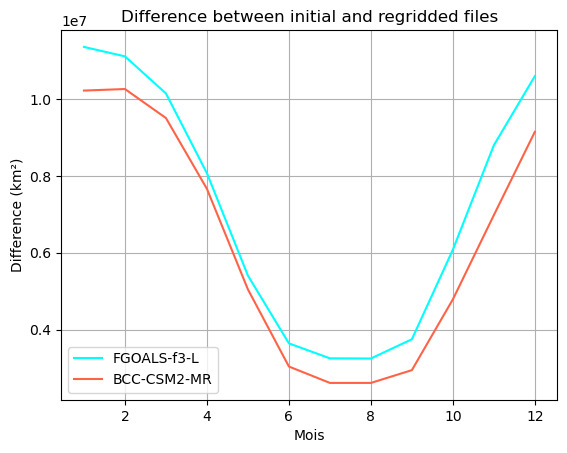

In [77]:
plt.plot(range(1, 13), diff_FGOALS, color="cyan", label="FGOALS-f3-L")
plt.plot(range(1, 13), diff, color="tomato", label="BCC-CSM2-MR")
#plt.plot(range(1, 13), diff_FGOALS_g3, color="palegreen", label="BCC-CSM2-MR")

plt.xlabel("Mois")
plt.ylabel("Difference (km²)")
plt.legend()
plt.grid()
plt.title("Difference between initial and regridded files")

## Tentative de boucle pour tous les modèles

In [78]:
# path
path_ini_hist = "/home/jovyan/private-storage/historical-LImon-snc/"
areacella_path1 = "/home/jovyan/private-storage/masques/masques/areacella/"
areacella_path2 = "/home/jovyan/private-storage/masques/masques/pseudo_areacella/"

✅ Traitement du modèle : BCC-CSM2-MR
<xarray.DataArray (month: 12)> Size: 96B
array([58981824.75728922, 59132482.01409894, 55748582.19121736,
       47660078.81770545, 35890087.72006677, 24799681.77587515,
       20006093.51974487, 19002958.36472448, 20847414.80936202,
       30980534.51265276, 43109260.4415566 , 53662911.05947356])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


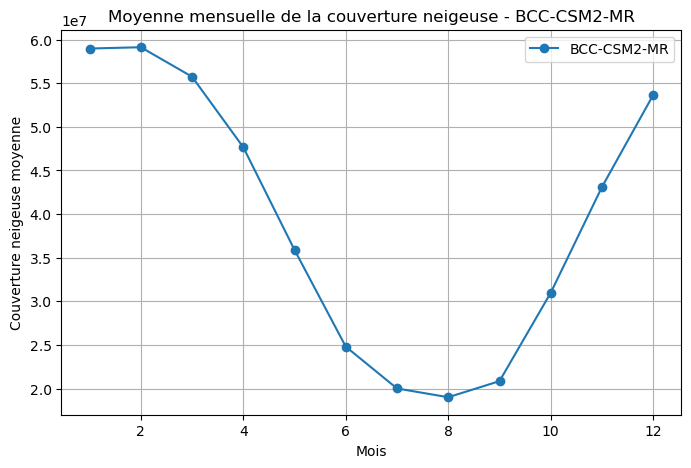

✅ Traitement du modèle : CanESM5
<xarray.DataArray (month: 12)> Size: 48B
array([7.7523241e+09, 7.7023227e+09, 7.4124319e+09, 6.6763238e+09,
       5.4777400e+09, 4.1783311e+09, 3.4917842e+09, 3.5059405e+09,
       3.9687726e+09, 5.2479524e+09, 6.7139768e+09, 7.5113426e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


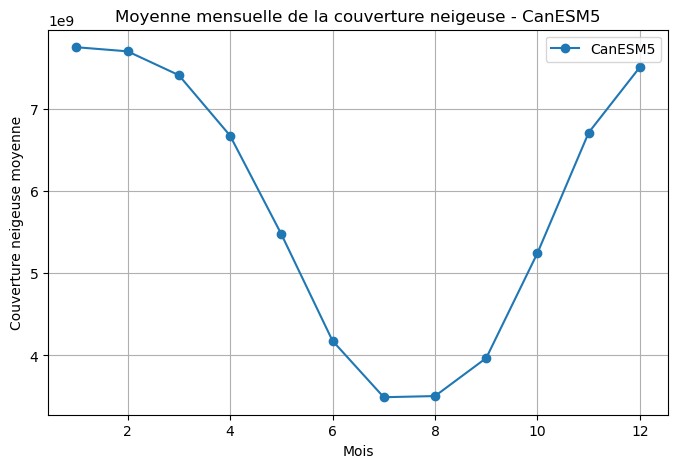

✅ Traitement du modèle : CanESM5-CanOE
<xarray.DataArray (month: 12)> Size: 48B
array([7.7657702e+09, 7.7183053e+09, 7.4677827e+09, 6.7708554e+09,
       5.5442954e+09, 4.2222492e+09, 3.5164872e+09, 3.4984599e+09,
       4.0059428e+09, 5.2941338e+09, 6.7750564e+09, 7.5776891e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


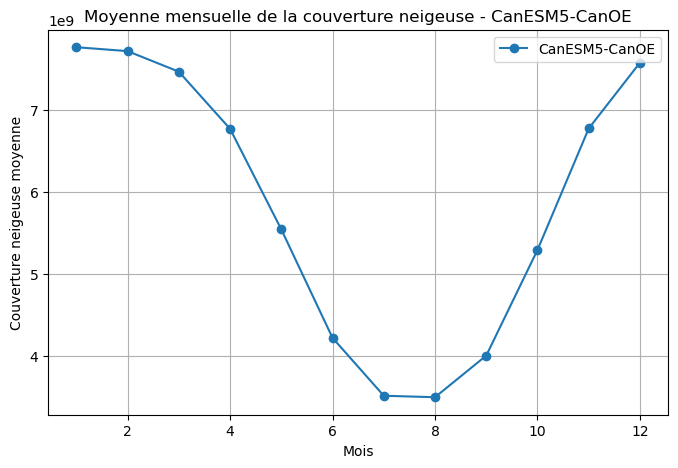

✅ Traitement du modèle : CESM2


/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'areacella' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.DataArray (month: 12)> Size: 48B
array([862511.1, 862511.1, 862511.1, 862511.1, 862511.1, 862511.1,
       862511.1, 862511.1, 862511.1, 862511.1, 862511.1, 862511.1],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


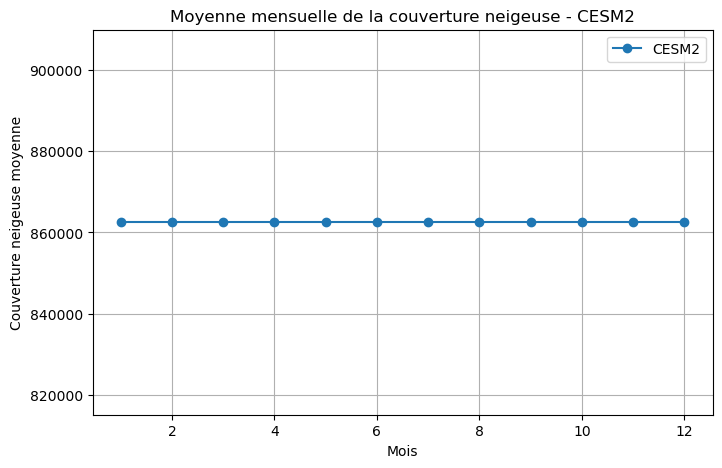

✅ Traitement du modèle : CESM2-WACCM


/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'areacella' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.DataArray (month: 12)> Size: 48B
array([862511.1, 862511.1, 862511.1, 862511.1, 862511.1, 862511.1,
       862511.1, 862511.1, 862511.1, 862511.1, 862511.1, 862511.1],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


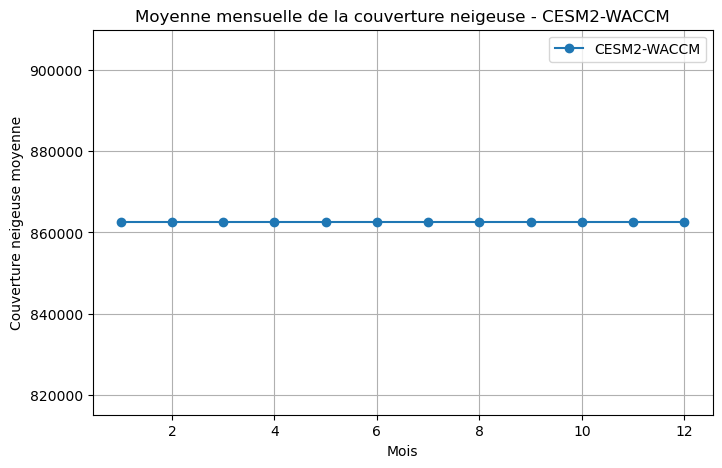

✅ Traitement du modèle : CIESM
<xarray.DataArray (month: 12)> Size: 96B
array([862379.92523476, 862379.92523476, 862379.92523476, 862379.92523476,
       862379.92523476, 862379.92523476, 862379.92523476, 862379.92523476,
       862379.92523476, 862379.92523476, 862379.92523476, 862379.92523476])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


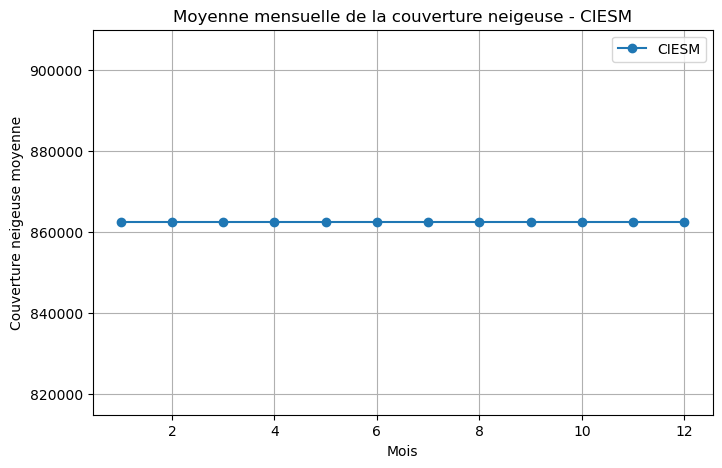

✅ Traitement du modèle : CNRM-CM6-1
<xarray.DataArray (month: 12)> Size: 48B
array([7.1128279e+09, 7.1019515e+09, 6.3864986e+09, 4.8813363e+09,
       3.2926935e+09, 2.1545544e+09, 1.9283606e+09, 1.8955181e+09,
       2.0902141e+09, 3.3037522e+09, 5.1090038e+09, 6.4621245e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


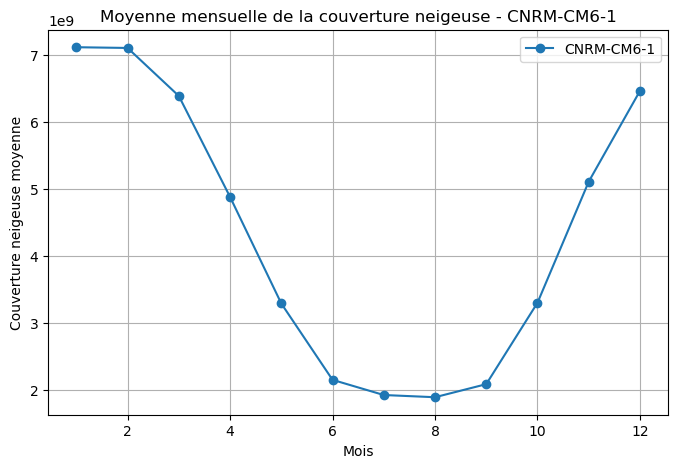

✅ Traitement du modèle : CNRM-CM6-1-HR
<xarray.DataArray (month: 12)> Size: 48B
array([6.8608169e+09, 6.8457016e+09, 6.2266312e+09, 4.7756078e+09,
       3.1834726e+09, 2.1265382e+09, 1.9056204e+09, 1.8925908e+09,
       2.1379981e+09, 3.3619820e+09, 5.0744515e+09, 6.3214177e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


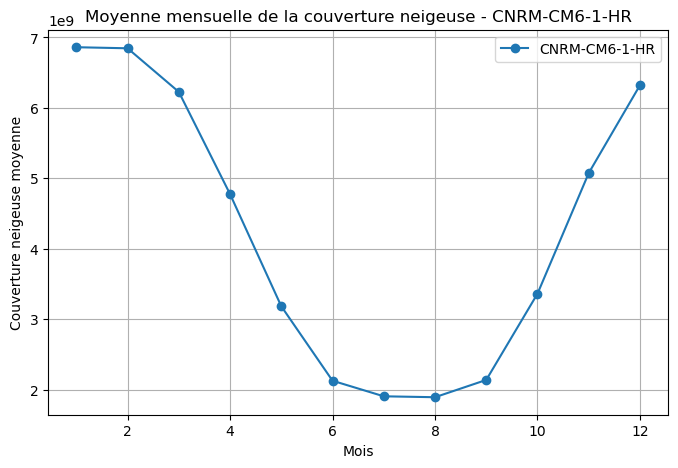

✅ Traitement du modèle : CNRM-ESM2-1
<xarray.DataArray (month: 12)> Size: 48B
array([6.8808719e+09, 6.8337111e+09, 6.1651021e+09, 4.7954929e+09,
       3.1889708e+09, 2.0968751e+09, 1.8901508e+09, 1.8555109e+09,
       2.0265829e+09, 3.1833452e+09, 4.8852255e+09, 6.2611973e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


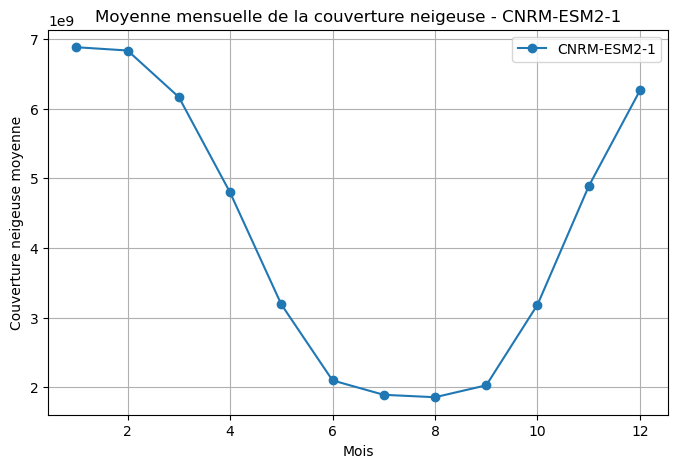

✅ Traitement du modèle : EC-Earth3
<xarray.DataArray (month: 12)> Size: 96B
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


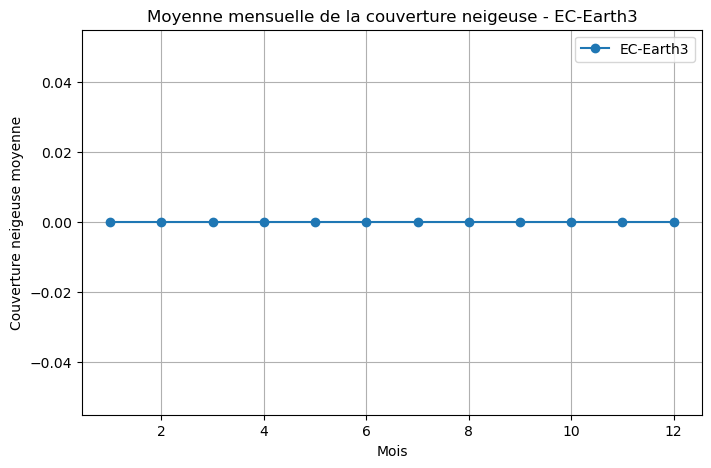

✅ Traitement du modèle : EC-Earth3-Veg
<xarray.DataArray (month: 12)> Size: 48B
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


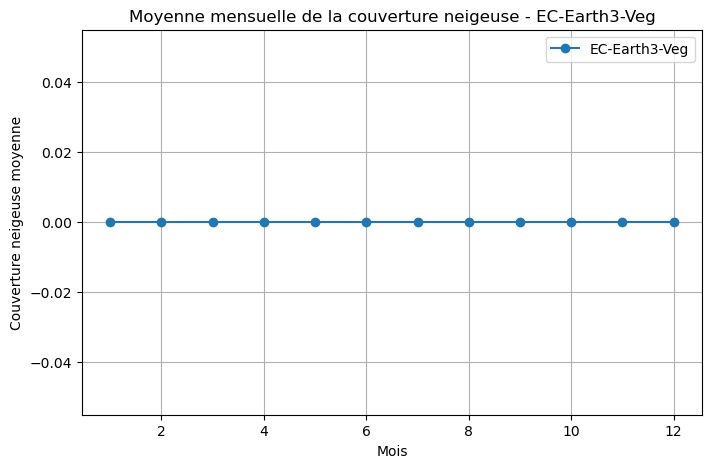

✅ Traitement du modèle : FGOALS-f3-L
<xarray.DataArray (month: 12)> Size: 96B
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


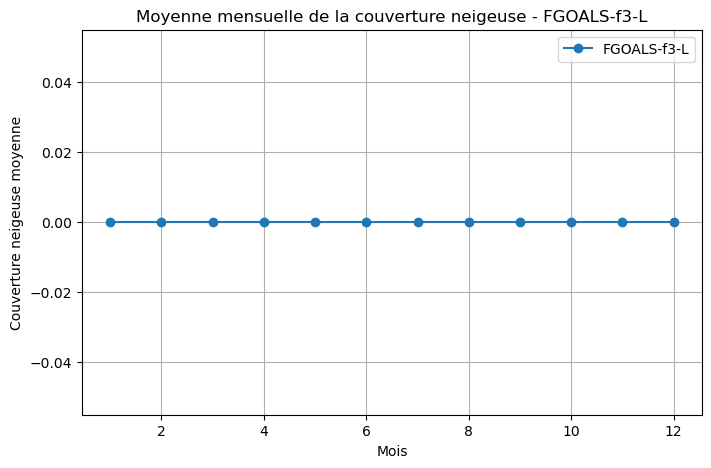

✅ Traitement du modèle : FGOALS-g3
<xarray.DataArray (month: 12)> Size: 96B
array([65707958.53343886, 65652608.21090187, 61336743.93385127,
       52204195.78004306, 38021270.40687536, 26344036.86310333,
       21789258.66133827, 21317897.30650992, 23887565.88099219,
       35771812.48252191, 50819881.21642274, 61342878.07528771])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


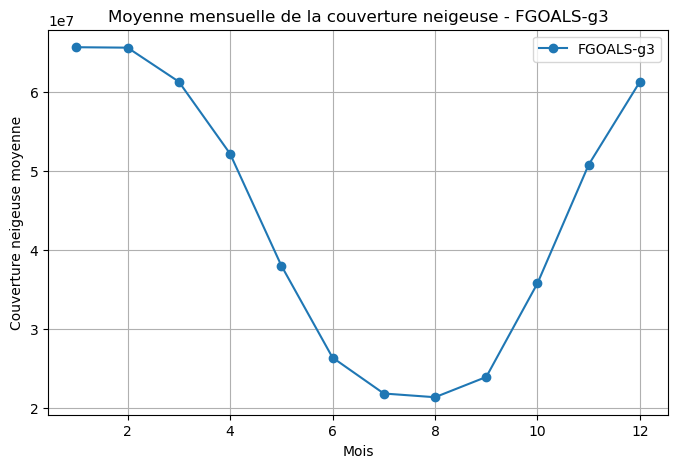

✅ Traitement du modèle : GFDL-CM4
<xarray.DataArray (month: 12)> Size: 48B
array([4.1870492e+09, 4.1554189e+09, 3.8061612e+09, 3.0811244e+09,
       2.2809810e+09, 1.6277542e+09, 1.4063620e+09, 1.4017421e+09,
       1.5915986e+09, 2.3063160e+09, 3.1742940e+09, 3.8938711e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


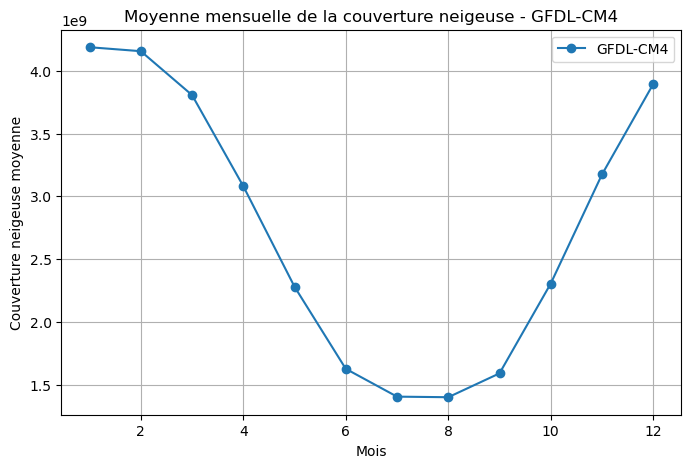

✅ Traitement du modèle : GISS-E2-1-G
<xarray.DataArray (month: 12)> Size: 48B
array([6.0488556e+09, 6.0262364e+09, 5.7425075e+09, 5.0793871e+09,
       4.1076844e+09, 2.8984207e+09, 2.2157409e+09, 2.1494257e+09,
       2.5578051e+09, 3.6950986e+09, 4.9248942e+09, 5.7192166e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


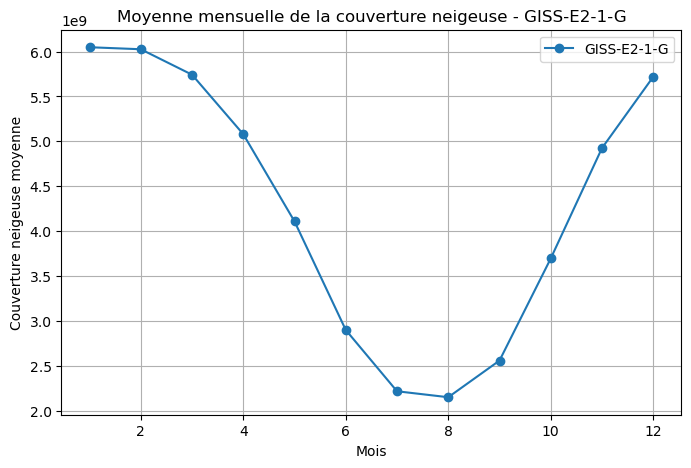

✅ Traitement du modèle : HadGEM3-GC31-LL
<xarray.DataArray (month: 12)> Size: 48B
array([6.5690839e+09, 6.5500677e+09, 6.2031421e+09, 5.1674696e+09,
       3.8171228e+09, 2.3942221e+09, 1.8255364e+09, 1.8719948e+09,
       2.6546982e+09, 4.3028475e+09, 5.6267085e+09, 6.3686164e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


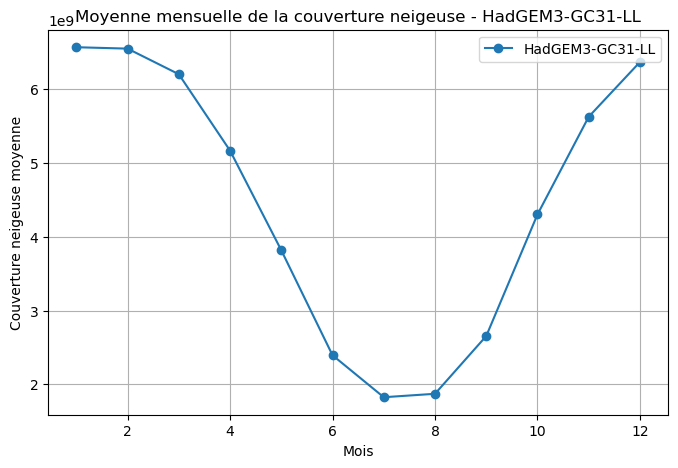

✅ Traitement du modèle : IPSL-CM6A-LR
<xarray.DataArray (month: 12)> Size: 48B
array([4.8842040e+09, 4.8049669e+09, 4.2616509e+09, 3.0789975e+09,
       1.5073235e+09, 5.5434336e+08, 3.8807222e+08, 3.6675142e+08,
       4.8909376e+08, 1.5833879e+09, 3.2075551e+09, 4.3726679e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


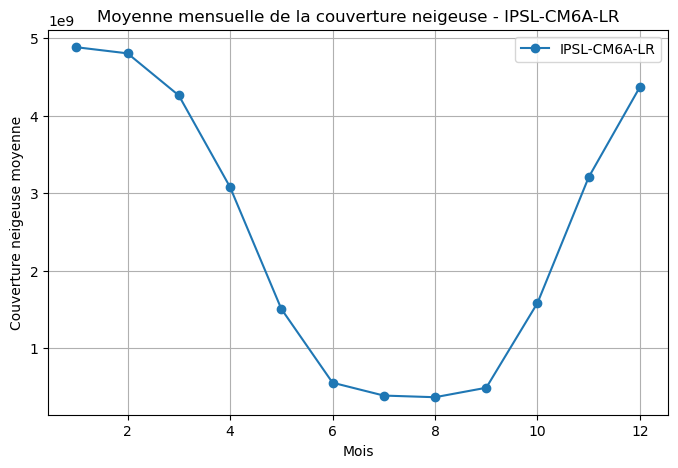

✅ Traitement du modèle : MIROC-ES2L
<xarray.DataArray (month: 12)> Size: 48B
array([6.2077967e+09, 6.2131502e+09, 5.7995735e+09, 4.7154412e+09,
       3.3363479e+09, 1.9619301e+09, 1.7599876e+09, 1.8251557e+09,
       2.3094508e+09, 3.6693642e+09, 5.2033004e+09, 6.0367386e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


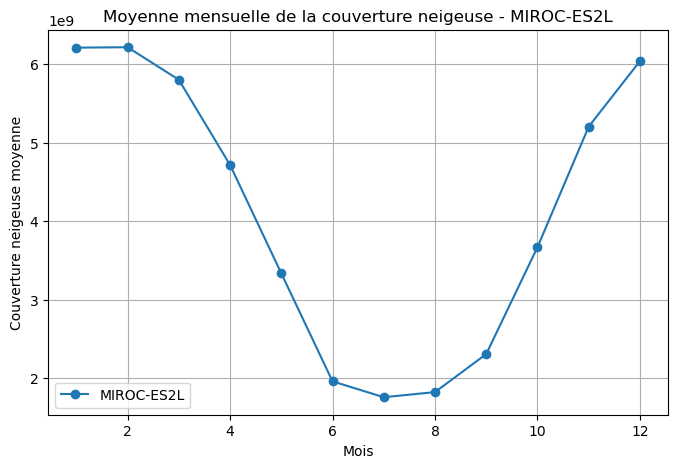

✅ Traitement du modèle : MIROC6
<xarray.DataArray (month: 12)> Size: 48B
array([6.5124157e+09, 6.4329221e+09, 5.9586596e+09, 4.8425795e+09,
       3.2860826e+09, 1.9340210e+09, 1.6529484e+09, 1.6840187e+09,
       2.0807704e+09, 3.5457467e+09, 5.0981294e+09, 6.2179635e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


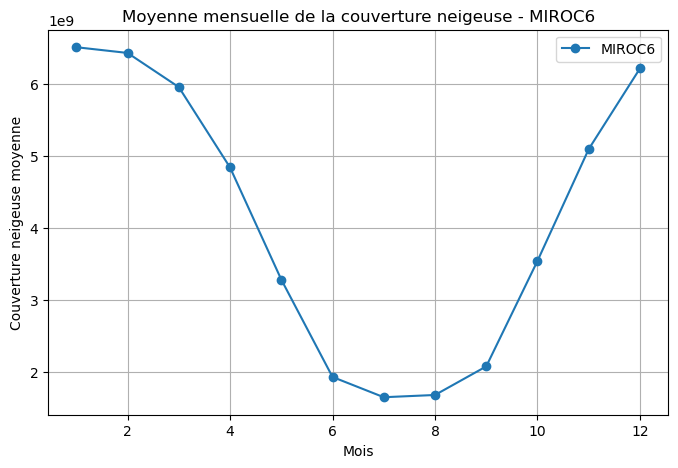

✅ Traitement du modèle : MPI-ESM1-2-HR
<xarray.DataArray (month: 12)> Size: 48B
array([3.9723133e+09, 3.9811525e+09, 3.6335657e+09, 2.9912100e+09,
       2.1071343e+09, 1.5608840e+09, 1.5454538e+09, 1.5457265e+09,
       1.6281496e+09, 2.1757304e+09, 3.0321428e+09, 3.6585656e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


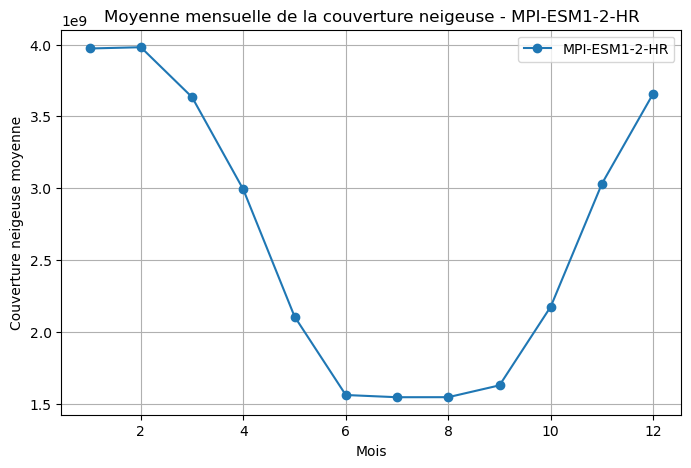

✅ Traitement du modèle : MPI-ESM1-2-LR
<xarray.DataArray (month: 12)> Size: 48B
array([3.5158031e+09, 3.5643379e+09, 3.2900531e+09, 2.7163451e+09,
       1.8817350e+09, 1.3026217e+09, 1.2845786e+09, 1.2837161e+09,
       1.3447049e+09, 1.8197985e+09, 2.5442647e+09, 3.1895107e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


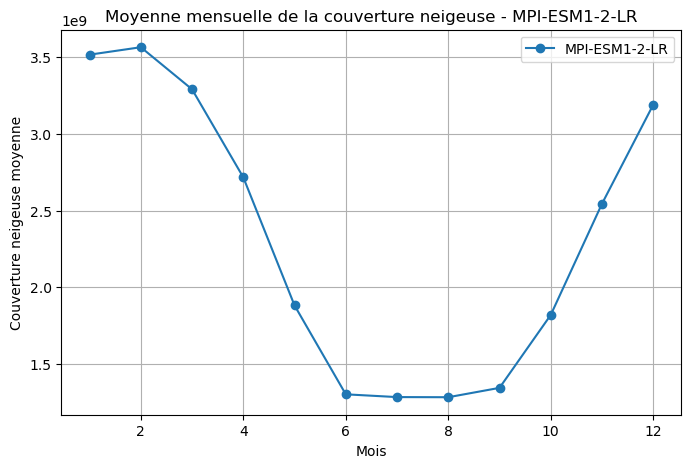

✅ Traitement du modèle : MRI-ESM2-0
<xarray.DataArray (month: 12)> Size: 48B
array([5.5499080e+09, 5.5046917e+09, 5.1235046e+09, 4.3877105e+09,
       3.1463583e+09, 1.9297248e+09, 1.5614756e+09, 1.5114939e+09,
       1.6513960e+09, 2.6091348e+09, 4.1198751e+09, 5.0980132e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


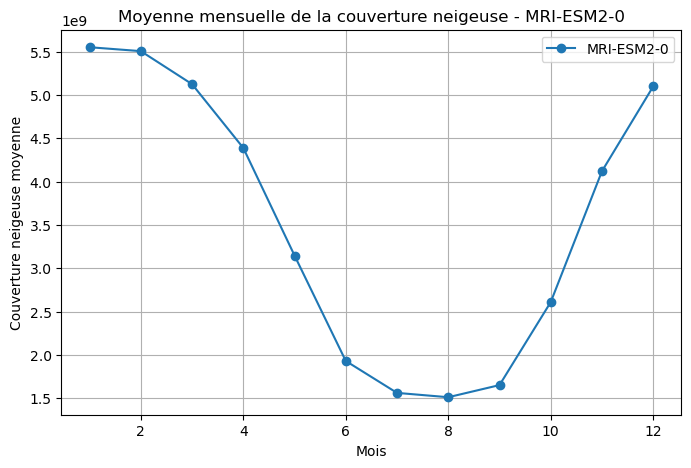

✅ Traitement du modèle : NorESM2-LM
<xarray.DataArray (month: 12)> Size: 48B
array([1.1678741e+08, 1.1678741e+08, 1.1678741e+08, 1.1678741e+08,
       1.1678741e+08, 1.1678741e+08, 1.1678741e+08, 1.1678741e+08,
       1.1678741e+08, 1.1678741e+08, 1.1678741e+08, 1.1678741e+08],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


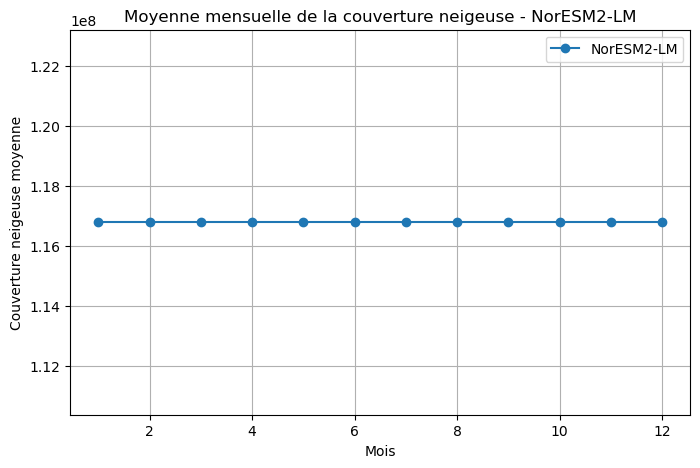

✅ Traitement du modèle : NorESM2-MM
<xarray.DataArray (month: 12)> Size: 48B
array([77406008., 77806304., 73316024., 68723472., 65919200., 64504944.,
       64070956., 63953092., 63931556., 64268492., 66630876., 71307184.],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


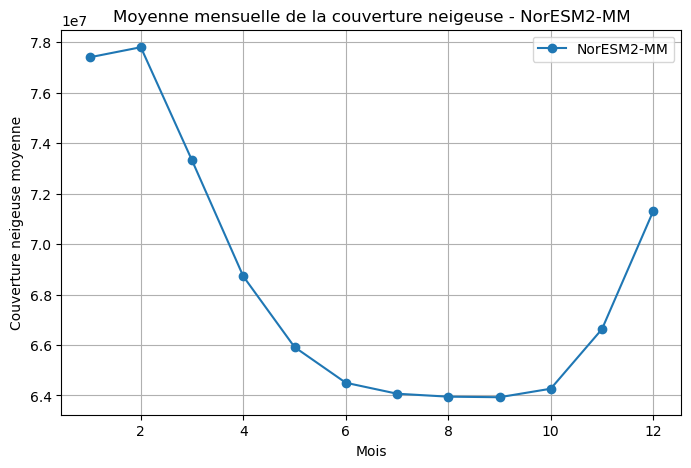

✅ Traitement du modèle : UKESM1-0-LL
<xarray.DataArray (month: 12)> Size: 48B
array([6.2937472e+09, 6.1351260e+09, 5.7088850e+09, 4.7579745e+09,
       3.6014054e+09, 2.6038001e+09, 1.8623552e+09, 1.9227753e+09,
       2.7456681e+09, 3.8832402e+09, 5.2586916e+09, 6.0892631e+09],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12


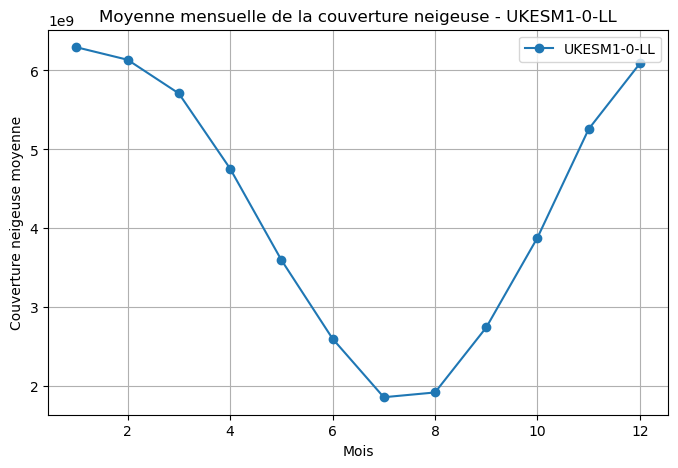

In [79]:
for model in models:
    file_pattern = os.path.join(path_ini_hist, f"snc_LImon_{model}_historical_*.nc")
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"❌ Fichier historique non trouvé pour {model}")
        continue
    
    historical_file = files[0]

    areacella_file = os.path.join(areacella_path1, f"areacella_{model}.nc")
    if not os.path.exists(areacella_file):
        areacella_file = os.path.join(areacella_path2, f"areacella_{model}.nc")
    
    if not os.path.exists(areacella_file):
        print(f"❌ Fichier areacella non trouvé pour {model}")
        continue

    print(f"✅ Traitement du modèle : {model}")

    with xr.open_dataset(historical_file) as ds_hist, xr.open_dataset(areacella_file) as ds_area:
        # période de ref 1995-2014
        ds_hist_ref = ds_hist.sel(time=slice("1995", "2014"))
        snow_cover = ds_hist_ref["snc"]

        # Moyenne mensuelle
        snow_cover = snow_cover.groupby("time.month").mean(dim="time")
        monthly_mean = snow_cover.mean(dim=("lat", "lon"))

        # Surface cellules
        cell_area = ds_area["areacella"]

        # Calcul km2
        snow_cover_km2 = (snow_cover * (cell_area * 1e-6)).groupby(snow_cover["month"]).sum(dim=["lat", "lon"], skipna=True)
        print(snow_cover_km2)

        plt.figure(figsize=(8, 5))
        plt.plot(range(1, 13), snow_cover_km2, marker="o", label=f"{model}")
        plt.xlabel("Mois")
        plt.ylabel("Couverture neigeuse moyenne")
        plt.title(f"Moyenne mensuelle de la couverture neigeuse - {model}")
        plt.grid()
        plt.legend()
        plt.show()